<a href="https://colab.research.google.com/github/TarunChaubey/A/blob/master/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.optimizers import SGD

In [4]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
x_val=[]
y_val=[]

dim=128

In [5]:
path_train='/content/drive/MyDrive/Kaggle/eINTERFACE_2021_Image/train'
path_test='/content/drive/MyDrive/Kaggle/eINTERFACE_2021_Image/test'
path_val='/content/drive/MyDrive/Kaggle/eINTERFACE_2021_Image/val'

category={'Anger':0,'Disgust':1,'Fear':2,'Happiness':3,'Sadness':4,'Surprise':5}

In [6]:
for i in sorted(os.listdir(path_train)):
#     print(i)
    path=os.path.join(path_train,i)
    for j in os.listdir(path):
        img=cv2.imread(os.path.join(path,j),0) #grayscaling
        img=cv2.resize(img,(dim,dim)) #resizing each image for uniformity
        x_train.append(img)
        y_train.append(category[i])

In [7]:
print('Number of Training images:',len(x_train))
print('Number of Labels for training images:',len(y_train))

Number of Training images: 11475
Number of Labels for training images: 11475


In [8]:
for i in sorted(os.listdir(path_test)):
#     print(i)
    path=os.path.join(path_test,i)
    for j in os.listdir(path):
        img=cv2.imread(os.path.join(path,j),0) #grayscaling
        img=cv2.resize(img,(dim,dim)) #resizing each image for uniformity
        x_test.append(img)
        y_test.append(category[i]) 

In [9]:
print('Number of Testing images:',len(x_test))
print('Number of Labels for testing images:',len(y_test))

Number of Testing images: 1438
Number of Labels for testing images: 1438


In [10]:
for i in sorted(os.listdir(path_val)):
    #print(i)
    path=os.path.join(path_val,i)
    for j in os.listdir(path):
        img=cv2.imread(os.path.join(path,j),0) #grayscaling
        img=cv2.resize(img,(dim,dim)) #resizing each image for uniformity
        x_val.append(img)
        y_val.append(category[i])

In [11]:
print('Number of Validation images:',len(x_val))

print('Number of Labels for validation images:',len(y_val))

Number of Validation images: 1433
Number of Labels for validation images: 1433


In [12]:
x_train= np.array(x_train, dtype="float") / 255.0
x_test=np.array(x_test,dtype="float") / 255.0
x_val= np.array(x_val, dtype="float") / 255.0

y_train= np.array(y_train) 
y_test=np.array(y_test)
y_val=np.array(y_val)

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
y_val=np_utils.to_categorical(y_val)

print(y_train)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [13]:
x_train_reshaped=x_train.reshape(x_train.shape[0],dim,dim,1)
x_test_reshaped=x_test.reshape(x_test.shape[0],dim,dim,1)
x_val_reshaped=x_val.reshape(x_val.shape[0],dim,dim,1)
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)
print(x_val_reshaped.shape)

(11475, 128, 128, 1)
(1438, 128, 128, 1)
(1433, 128, 128, 1)


In [14]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), input_shape=(dim,dim,1), activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(6,activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        3

In [16]:
epoch=50
learning_rate=0.01
decay_rate=learning_rate/epoch
momentum=0.8
sgd=SGD(lr=learning_rate,momentum=momentum,decay=decay_rate)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [19]:
#model.save_weights("my_initial_weights.h5")

In [20]:
model_history=model.fit(x_train_reshaped,y_train,batch_size=32,epochs=epoch,validation_data=(x_val_reshaped,y_val),shuffle=True, callbacks=[callback])

Epoch 1/50
359/359 [==============================] - 52s 53ms/step - loss: 1.5859 - accuracy: 0.3279 - val_loss: 1.3778 - val_accuracy: 0.4752
Epoch 2/50
359/359 [==============================] - 18s 49ms/step - loss: 1.1108 - accuracy: 0.5576 - val_loss: 0.9201 - val_accuracy: 0.6518
Epoch 3/50
359/359 [==============================] - 18s 50ms/step - loss: 0.8086 - accuracy: 0.6956 - val_loss: 0.7417 - val_accuracy: 0.7334
Epoch 4/50
359/359 [==============================] - 18s 51ms/step - loss: 0.5843 - accuracy: 0.7861 - val_loss: 0.5801 - val_accuracy: 0.7934
Epoch 5/50
359/359 [==============================] - 19s 52ms/step - loss: 0.4486 - accuracy: 0.8356 - val_loss: 0.4509 - val_accuracy: 0.8395
Epoch 6/50
359/359 [==============================] - 19s 52ms/step - loss: 0.3602 - accuracy: 0.8709 - val_loss: 0.4277 - val_accuracy: 0.8660
Epoch 7/50
359/359 [==============================] - 19s 52ms/step - loss: 0.2765 - accuracy: 0.9011 - val_loss: 0.2971 - val_accuracy:

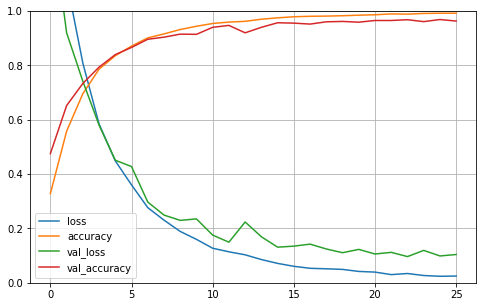

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
model.evaluate(x_test_reshaped,y_test)

45/45 [==============================] - 1s 26ms/step - loss: 0.1464 - accuracy: 0.9604


[0.14639827609062195, 0.9603615999221802]